# 고급회귀분석 실습 CH10

SEOYEON CHOI  
2022-11-21

CH10

# 회귀진단

In [3]:
library(lmtest)

## 데이터 입력

In [5]:
dt <- data.frame(x = c(15,26,10,9,15,20,18,11,
                       8,20,7,9,10,11,11,10,12,42,17,11,10),
                 y = c(95,71,83,91,102,87,93,100,
                       104,94,113,96,83,84,102,100,
                       105,57,121,86,100))

### 산점도

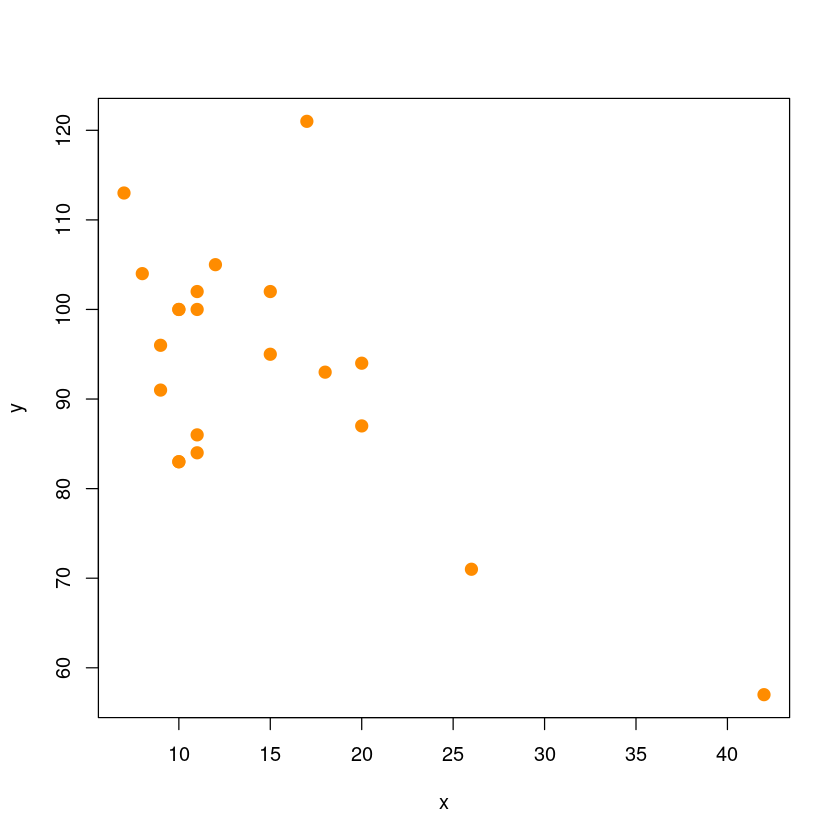

In [6]:
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")

### 회귀적합

In [7]:
model_reg <- lm(y~x, dt)

In [8]:
summary(model_reg)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.604  -8.731   1.396   4.523  30.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.8738     5.0678  21.681 7.31e-15 ***
x            -1.1270     0.3102  -3.633  0.00177 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.02 on 19 degrees of freedom
Multiple R-squared:   0.41, Adjusted R-squared:  0.3789 
F-statistic:  13.2 on 1 and 19 DF,  p-value: 0.001769

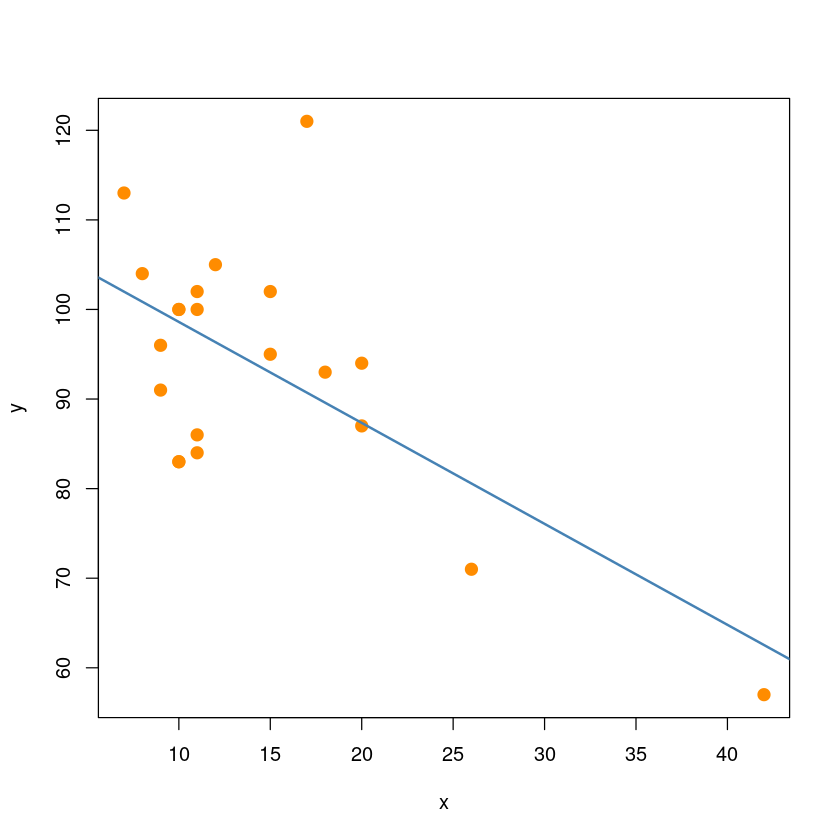

In [10]:
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")
abline(model_reg, col='steelblue', lwd=2)

### 잔차

In [12]:
residual <- model_reg$residuals  ## e_i = y_i - hat(y_i)
## resid(model_reg)

### 내적으로 표준화된 잔차

In [14]:
s_residual<- rstandard(model_reg)

In [15]:
# # 또는
# s_xx <- sum((dt$x-mean(dt$x))^2)  #S_xx
# h_ii <- 1/21 + (dt$x- mean(dt$x))^2/s_xx
# ## h_ii <- influence(model_reg)$hat
# hat_sigma <-  summary(model_reg)$sigma   #hat sigma
# s_residual <- residual/(hat_sigma*sqrt(1-h_ii)) ## 내적

### 외적으로 스튜던트화된 잔차

In [18]:
s_residual_i <- rstudent(model_reg) ## 외적으로 스튜던트화 잔차

In [19]:
# # 또는
# hat_sigma_i <- sqrt(((21-1-1)*hat_sigma^2 - residual^2/(1-h_ii) )/(21-1-2))
# ## hat_sigma_i <- influence(model_reg)$sigma
# s_residual_i <-  residual/(hat_sigma_i*sqrt(1-h_ii)) ## 외적

### 잔차그림

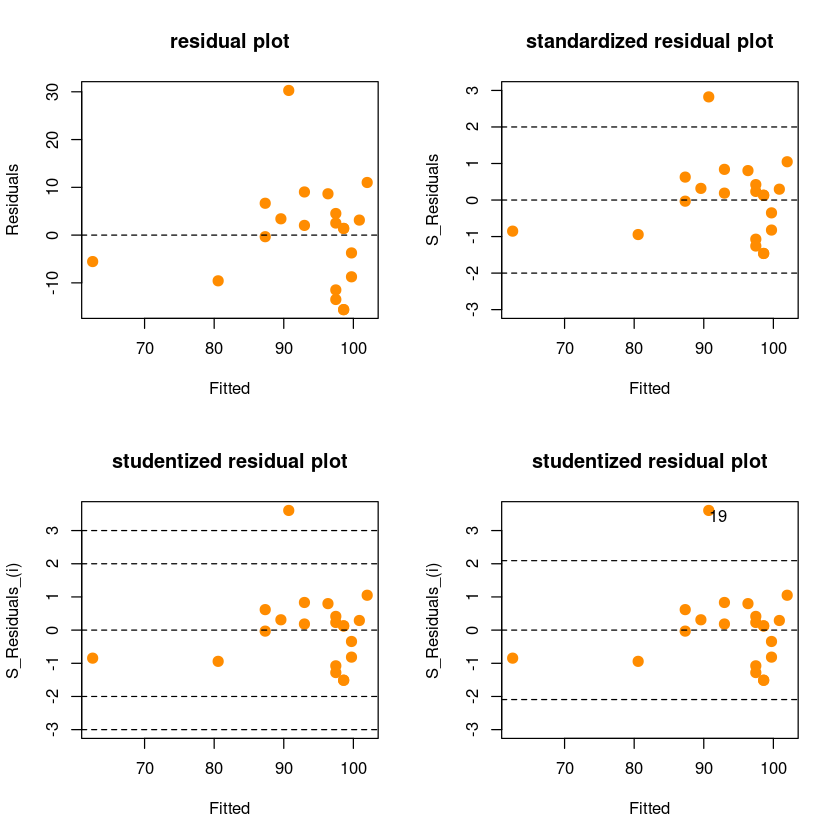

In [20]:
par(mfrow = c(2, 2))

plot(fitted(model_reg), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(model_reg), s_residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(s_residual)), 
            max(3,max(s_residual))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(model_reg), s_residual_i, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(s_residual_i)), 
            max(3,max(s_residual_i))),
     main = "studentized residual plot")
abline(h=c(-3,-2,0,2,3), lty=2)

plot(fitted(model_reg), s_residual_i, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(s_residual_i)), 
            max(3,max(s_residual_i))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,21-2),0,qt(0.975,21-2)), lty=2)
text (fitted(model_reg)[which(abs(s_residual_i)>qt(0.975,21-2))],
      s_residual_i[which(abs(s_residual_i)>qt(0.975,21-2))], 
      which(abs(s_residual_i)>qt(0.975,21-2)),adj = c(0,1))


In [21]:
## 이상치 검정
qt(0.975,21-2) #기각역 

2.09302405440831

In [22]:
s_residual_i

1 0.183968493379394 2 -0.941583351378201 3 -1.51081192291799 4 -0.814263363159438 5 0.832862917520795 6 -0.030631827537088 7 0.311246764732158 8 0.229715749649931 9 0.289910136925676 10 0.617660260595883 11 1.05084716358865 12 -0.342831483529281 13 -1.51081192291799 14 -1.27977575448039 15 0.413153195694502 16 0.127393415386012 17 0.798281144415116 18 -0.845110861537551 19 3.60697972130439 20 -1.07648107628971 21 0.127393415386012

In [23]:
s_residual_i[which(abs(s_residual_i)>qt(0.975,21-2))]

19: 3.60697972130439

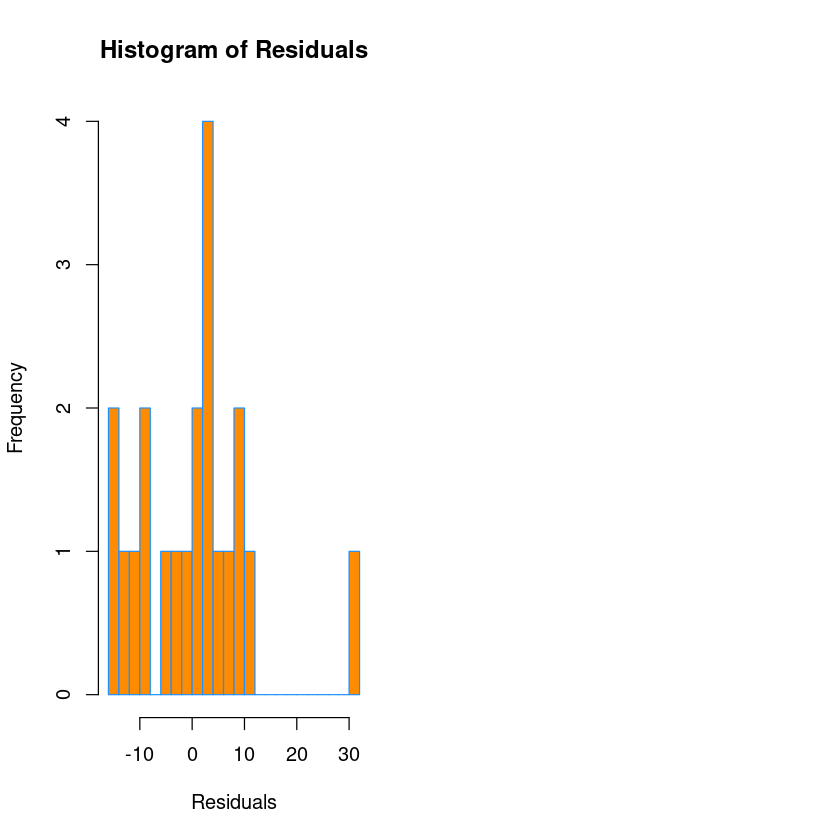

In [24]:
## 정규성 검정
par(mfrow=c(1,2))
hist(resid(model_reg),
     xlab   = "Residuals",
     main   = "Histogram of Residuals",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

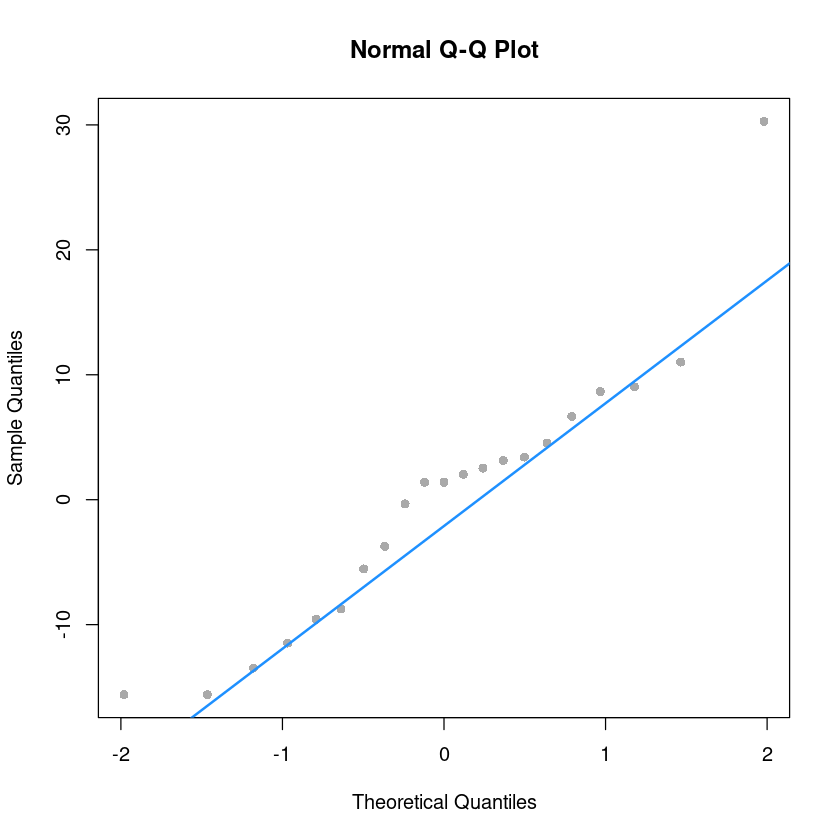

In [26]:
qqnorm(resid(model_reg), 
       main = "Normal Q-Q Plot", 
       col = "darkgrey",
       pch=16)
qqline(resid(model_reg), col = "dodgerblue", lwd = 2)

In [27]:
graphics.off()

### 독립성 검정

In [28]:
lmtest::dwtest(model_reg)


    Durbin-Watson test

data:  model_reg
DW = 2.0844, p-value = 0.5716
alternative hypothesis: true autocorrelation is greater than 0

### 영향점

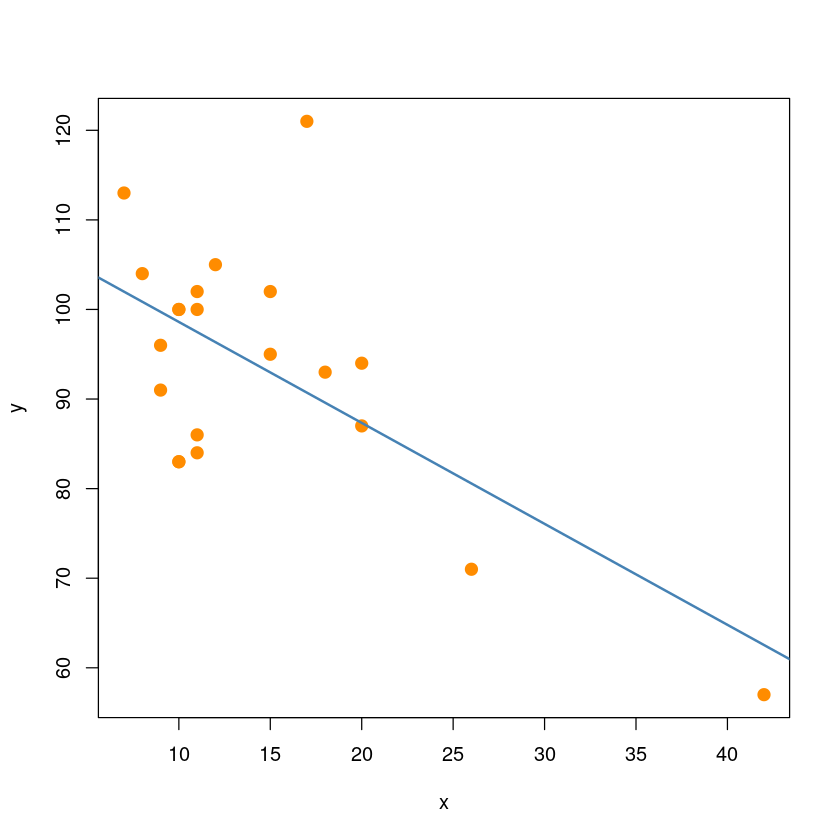

In [29]:
par(mfrow=c(1,1))
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")
abline(model_reg, col='steelblue', lwd=2)

In [32]:
# influence(model_reg)
influence.measures(model_reg)

Influence measures of
     lm(formula = y ~ x, data = dt) :

     dfb.1_    dfb.x    dffit cov.r   cook.d    hat inf
1   0.01664  0.00328  0.04127 1.166 8.97e-04 0.0479    
2   0.18862 -0.33480 -0.40252 1.197 8.15e-02 0.1545    
3  -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
4  -0.20004  0.12788 -0.22433 1.115 2.56e-02 0.0705    
5   0.07532  0.01487  0.18686 1.085 1.77e-02 0.0479    
6   0.00113 -0.00503 -0.00857 1.201 3.88e-05 0.0726    
7   0.00447  0.03266  0.07722 1.170 3.13e-03 0.0580    
8   0.04430 -0.02250  0.05630 1.174 1.67e-03 0.0567    
9   0.07907 -0.05427  0.08541 1.200 3.83e-03 0.0799    
10 -0.02283  0.10141  0.17284 1.152 1.54e-02 0.0726    
11  0.31560 -0.22889  0.33200 1.088 5.48e-02 0.0908    
12 -0.08422  0.05384 -0.09445 1.183 4.68e-03 0.0705    
13 -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
14 -0.24681  0.12536 -0.31367 0.992 4.76e-02 0.0567    
15  0.07968 -0.04047  0.10126 1.159 5.36e-03 0.0567    
16  0.02791 -0.01622  0.03298 1.187 5.74e-0

In [33]:
hatvalues(model_reg)

1 0.0479224794510218 2 0.154513234296056 3 0.0628157755825353 4 0.0705452077520549 5 0.0479224794510218 6 0.0726189578463163 7 0.0579895935449815 8 0.0566699343940879 9 0.0798582309026469 10 0.0726189578463163 11 0.0907548450343111 12 0.0705452077520549 13 0.0628157755825353 14 0.0566699343940879 15 0.0566699343940879 16 0.0628157755825353 17 0.0521076841867129 18 0.65160998416409 19 0.0530502978659226 20 0.0566699343940879 21 0.0628157755825353

In [34]:
dffits(model_reg)  

1 0.0412740357514056 2 -0.402520687302525 3 -0.391140045474215 4 -0.224328533660804 5 0.186855983882421 6 -0.00857173640678122 7 0.0772239528389379 8 0.0563034865220476 9 0.085407472693718 10 0.172840518129759 11 0.331996853994253 12 -0.0944496430423618 13 -0.391140045474215 14 -0.313673908094842 15 0.101264129345836 16 0.0329813827461469 17 0.187166128054405 18 -1.15577873097521 19 0.853737107130766 20 -0.263846244162542 21 0.0329813827461469

In [35]:
cooks.distance(model_reg)

1 0.000897406392870691 2 0.0814979551507635 3 0.0716581442213833 4 0.0256159582452641 5 0.0177436626335013 6 3.87762740910137e-05 7 0.0031305748029949 8 0.00166820857813469 9 0.00383194880672965 10 0.0154395158127621 11 0.0548101351203612 12 0.00467762256482442 13 0.0716581442213833 14 0.0475978118328145 15 0.00536121617564154 16 0.000573584529113046 17 0.017856495213809 18 0.678112028575845 19 0.223288273631179 20 0.0345188940892692 21 0.000573584529113046

In [36]:
covratio(model_reg)

1 1.16589181683219 2 1.19699897676296 3 0.936347397341839 4 1.11510268993929 5 1.08504108257728 6 1.20131998275497 7 1.17015757898673 8 1.17423726760803 9 1.19966823450598 10 1.15209128858604 11 1.08783960928084 12 1.18326164825873 13 0.936347397341839 14 0.992331347870996 15 1.15904532932769 16 1.18673688685713 17 1.09643883044992 18 2.95868271380702 19 0.396431612340971 20 1.04257281407241 21 1.18673688685713

In [37]:
summary(influence.measures(model_reg))

Potentially influential observations of
     lm(formula = y ~ x, data = dt) :

   dfb.1_ dfb.x   dffit   cov.r   cook.d hat    
18  0.83  -1.11_* -1.16_*  2.96_*  0.68   0.65_*
19  0.14   0.27    0.85    0.40_*  0.22   0.05  

### 기각역

In [38]:
p <- 1

In [40]:
n <- 21

In [41]:
2*(p+1)/n #hat (h_ii)

0.19047619047619

In [42]:
2*sqrt((p+1)/(n-p-1)) #Dffits

0.64888568452305

In [43]:
qf(0.5, p+1, n-p-1) #Cook d

0.719060569091733

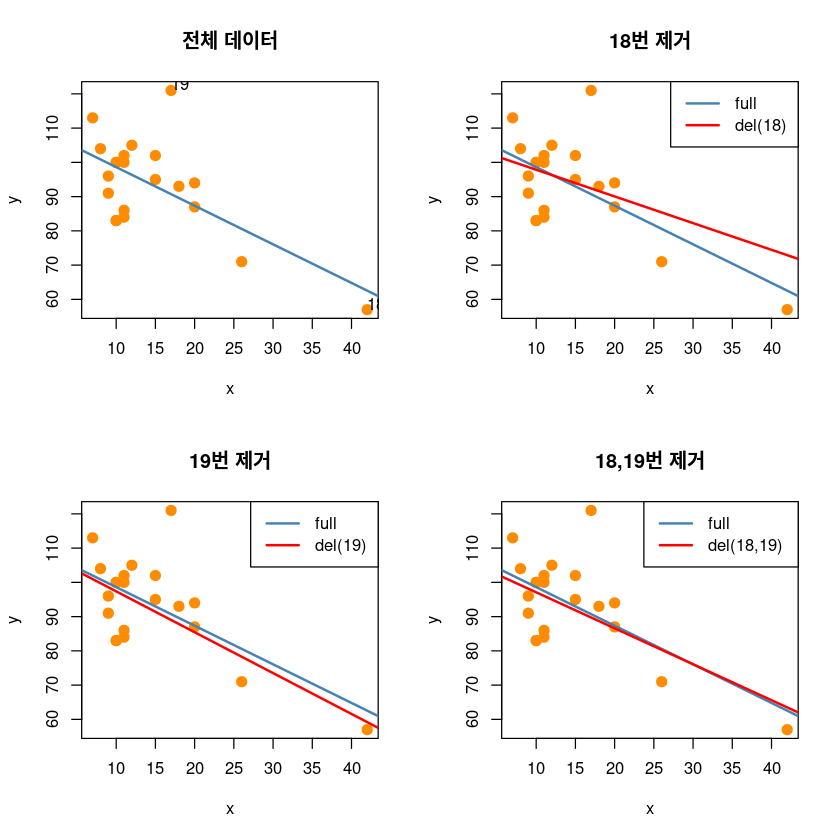

In [46]:
par(mfrow=c(2,2))
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "전체 데이터")
abline(model_reg, col='steelblue', lwd=2)
text (dt[18:19,],c('18', '19'),adj = c(0,0))

## 18제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "18번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-18,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(18)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

## 19제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-19,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(19)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)
# not leverage and high influence, outlier


## 18, 19제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "18,19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-c(18,19),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(18,19)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)

### 회귀진단 그림

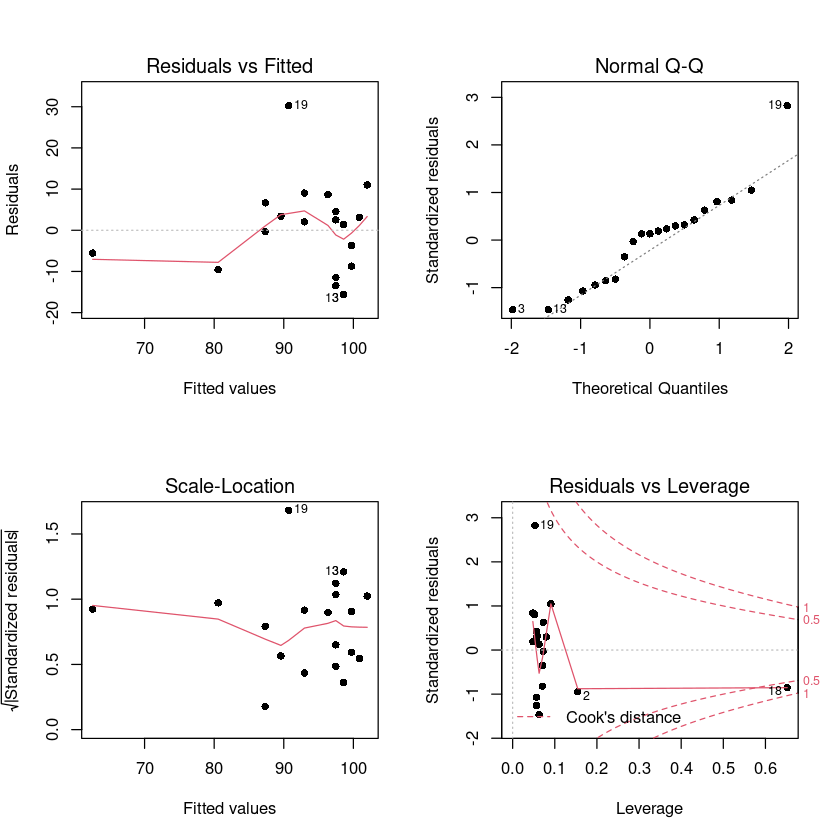

In [47]:
par(mfrow = c(2, 2))
plot(model_reg, pch=16)

### Hitters

In [49]:
library(ISLR)

In [50]:
hitters <- na.omit(Hitters)

In [51]:
dim(hitters)

263 20

In [52]:
head(hitters)

In [53]:
reg_model <- lm(Salary ~ AtBat + Hits + HmRun, hitters)

In [54]:
summary(reg_model)


Call:
lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-884.75 -214.97  -58.05  175.88 1991.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  158.754     75.815   2.094  0.03724 *  
AtBat         -1.564      0.641  -2.440  0.01536 *  
Hits           8.329      2.053   4.056 6.61e-05 ***
HmRun          9.502      3.384   2.808  0.00536 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398.9 on 259 degrees of freedom
Multiple R-squared:  0.2271,    Adjusted R-squared:  0.2182 
F-statistic: 25.37 on 3 and 259 DF,  p-value: 2.013e-14

In [55]:
vcov(reg_model)

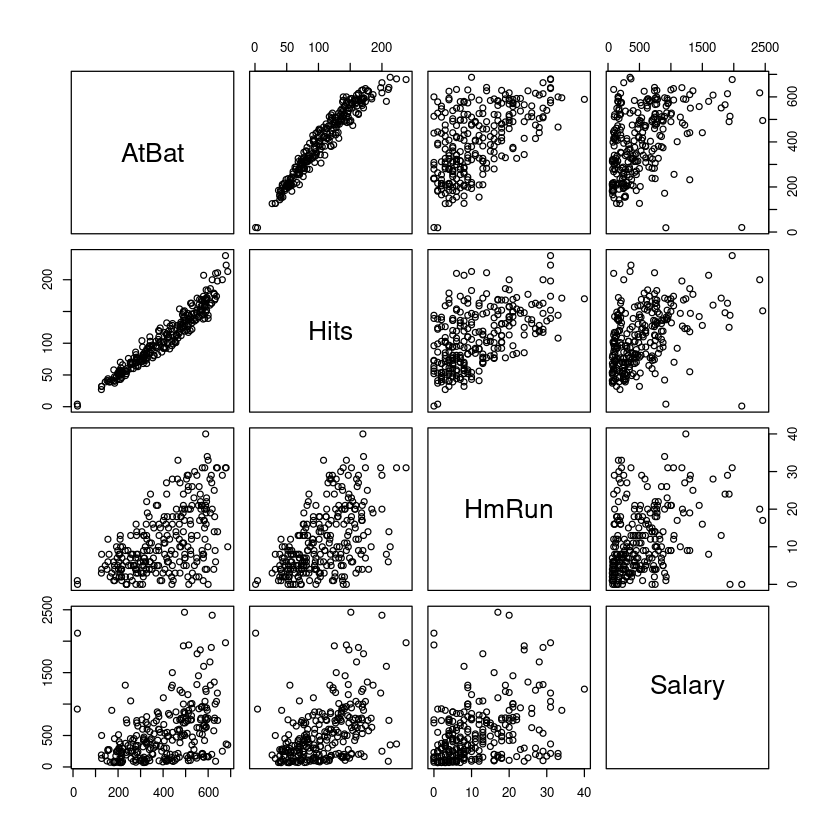

In [56]:
pairs(hitters[,c(1,2,3,19)])

In [57]:
## 잔차그림 
residual <- resid(reg_model)
stad.res <- rstandard(reg_model)
stu.res <- rstudent(reg_model)

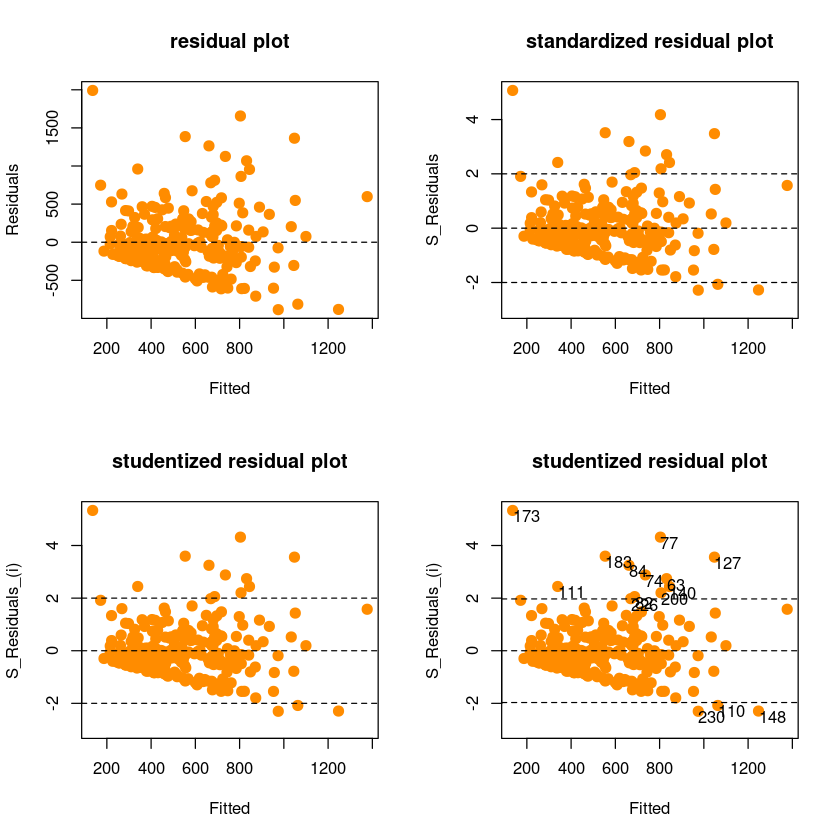

In [58]:
par(mfrow = c(2, 2))
plot(fitted(reg_model), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(reg_model), stad.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(stad.res)), 
            max(3,max(stad.res))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,nrow(hitters)-4),0,qt(0.975,nrow(hitters)-4)), lty=2)
text (fitted(reg_model)[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
      stu.res[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))], 
      which(abs(stu.res)>qt(0.975,nrow(hitters)-4)),adj = c(0,1))

In [59]:
stu.res[abs(stu.res)>qt(0.975,nrow(hitters)-4)]

-Dale Murphy 2.74033829619024 -Dave Winfield 2.88089264730221 -Eddie Murray 4.31895378037471 -George Brett 2.05782174934042 -Gary Carter 3.24866258649007 -Joe Carter -2.08071298999844 -Jack Clark 2.44291700843437 -Jim Rice 3.5583979165244 -Keith Hernandez 2.44056603081697 -Kirby Puckett -2.29372779175543 -Mike Schmidt 5.33366401188885 -Ozzie Smith 3.5948319898282 -Rickey Henderson 2.20244386003162 -Steve Garvey 1.97931624811918 -Steve Sax -2.30201279255003

In [60]:
which(abs(stu.res)>qt(0.975,nrow(hitters)-4))

-Dale Murphy 63 -Dave Winfield 74 -Eddie Murray 77 -George Brett 82 -Gary Carter 84 -Joe Carter 110 -Jack Clark 111 -Jim Rice 127 -Keith Hernandez 140 -Kirby Puckett 148 -Mike Schmidt 173 -Ozzie Smith 183 -Rickey Henderson 200 -Steve Garvey 226 -Steve Sax 230

In [61]:
influence(reg_model)

$sigma 
 -Alan Ashby 399.634203569099 -Alvin Davis 399.492597339658 -Andre Dawson 399.357259506549 -Andres Galarraga 398.933958984569 -Alfredo Griffin 399.628837026824 -Al Newman 399.589183690645 -Argenis Salazar 399.45913958176 -Andres Thomas 399.186969057154 -Andre Thornton 397.63748684862 -Alan Trammell 399.305567442193 -Alex Trevino 399.47898208154 -Andy VanSlyke 399.654722352462 -Alan Wiggins 398.809647826131 -Bill Almon 399.649936999163 -Buddy Bell 399.656593829134 -Buddy Biancalana 399.617963490199 -Bruce Bochy 399.517436655539 -Barry Bonds 399.117135210789 -Bobby Bonilla 399.173453123254 -Bob Brenly 399.638214399165 -Bill Buckner 399.651742803744 -Brett Butler 399.574300125236 -Bob Dernier 398.830912043822 -Bo Diaz 399.52670812524 -Bill Doran 399.656542576923 -Brian Downing 399.435802080694 -Billy Hatcher 399.058122239888 -Brook Jacoby 399.469820860983 -Bob Kearney 399.656489418298 -Bill Madlock 399.199661955533 -Bob Melvin 399.466996751965 -BillyJo Robidoux 399.532114622873 -Bill Schroeder 399.617758642113 -Chris Bando 399.648029050811 -Chris Brown 398.616310438533 -Carmen Castillo 399.558389784502 -Chili Davis 399.561670241124 -Carlton Fisk 398.625143843004 -Curt Ford 399.431008718328 -Carney Lansford 398.926230716375 -Chet Lemon 399.478161122053 -Candy Maldonado 399.572887009363 -Carmelo Martinez 399.656443141091 -Craig Reynolds 399.648479206124 -Cal Ripken 398.612250898437 -Cory Snyder 397.956233002957 -Chris Speier 399.635873837542 -Curt Wilkerson 399.653274124473 -Dave Anderson 399.645838956195 -Don Baylor 399.332313144429 -Daryl Boston 399.320992119561 -Darnell Coles 397.824487497975 -Dave Concepcion 399.641570126188 -Doug DeCinces 399.539814233217 -Darrell Evans 399.581917564588 -Dwight Evans 399.431220069416 -Damaso Garcia 399.198095338432 -Dan Gladden 399.361682500835 -Dave Henderson 399.404765367991 -Donnie Hill 399.478033157219 -Davey Lopes 399.648557868608 -Don Mattingly 397.743646040557 -Dale Murphy 393.964283305825 -Dwayne Murphy 399.500396526051 -Dave Parker 399.565499922729 -Dan Pasqua 398.677165239333 -Darrell Porter 399.59464075442 -Dick Schofield 399.648624041364 -Don Slaught 399.643928622877 -Darryl Strawberry 398.303115961143 -Dale Sveum 399.190292541126 -Danny Tartabull 397.875762023231 -Denny Walling 399.624442702131 -Dave Winfield 393.379419635538 -Eric Davis 398.765458160105 -Eddie Milner 399.636464677271 -Eddie Murray 385.948066373798 -Ed Romero 399.540856668197 -Frank White 399.655475127278 -George Bell 399.628236270768 -Glenn Braggs 399.429525938891 -George Brett 396.416592064954 -Greg Brock 399.644129572991 -Gary Carter 391.724908196771 -Glenn Davis 397.825873937425 -Gary Gaetti 399.629327956353 -Greg Gagne 399.014594348095 -George Hendrick 399.441514335659 -Glenn Hubbard 399.472407530578 -Garth Iorg 399.654394940912 -Gary Matthews 399.539923897956 -Graig Nettles 399.462993329827 -Gary Pettis 399.584369549925 -Gary Redus 399.651883210097 -Garry Templeton 399.185460011545 -Greg Walker 399.656193673305 -Gary Ward 399.655966022193 -Glenn Wilson 399.648238491901 -Harold Baines 399.628458110819 -Hubie Brooks 399.631800047401 -Howard Johnson 399.637790944298 -Hal McRae 399.645132646166 -Harold Reynolds 399.438307895792 -Harry Spilman 399.5700147204 -Herm Winningham 399.545267959526 -Jesse Barfield 399.444717016645 -Juan Beniquez 399.600368849692 -John Cangelosi 399.346282156929 -Jose Canseco 398.02468475877 -Joe Carter 396.345005739808 -Jack Clark 395.113012819977 -Jose Cruz 399.530072034124 -Jody Davis 398.960009857206 -Jim Dwyer 399.650790727091 -Julio Franco 399.634941644984 -Jim Gantner 399.30120909998 -Johnny Grubb 399.509727897045 -Jack Howell 399.4451037316 -John Kruk 398.989538398825 -Jeffrey Leonard 398.974767418778 -Jim Morrison 398.505945585891 -John Moses 399.114195166899 -Jerry Mumphrey 399.613137347821 -Jim Presley 397.818000372507 -Johnny Ray 399.594524245333 -Jeff Reed 399.515249933965 -Jim Rice 390.196208465802 -Jerry Royster 399.603735704486 -John Russell 399.30666953672 -Juan 

In [62]:
influence.measures(reg_model)

Influence measures of
     lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                      dfb.1_  dfb.AtBt  dfb.Hits  dfb.HmRn     dffit cov.r
-Alan Ashby         8.68e-03 -6.36e-04 -6.23e-04 -2.46e-03  0.012536 1.021
-Alvin Davis        2.57e-03 -1.04e-03 -1.14e-04 -1.52e-02 -0.035436 1.018
-Andre Dawson       8.66e-04  1.72e-02 -1.95e-02 -2.86e-02 -0.056997 1.018
-Andres Galarraga  -5.56e-02  2.75e-02 -1.80e-02 -9.47e-03 -0.071519 1.006
-Alfredo Griffin   -1.01e-02  3.72e-03  4.44e-03 -2.25e-02  0.030079 1.041
-Al Newman         -2.65e-02 -3.65e-03  9.76e-03  8.78e-03 -0.035316 1.029
-Argenis Salazar   -2.44e-02 -9.92e-03  1.02e-02  3.52e-02 -0.053094 1.023
-Andres Thomas     -3.38e-02 -8.41e-03  1.25e-02  1.99e-02 -0.059697 1.012
-Andre Thornton     1.36e-03  1.05e-01 -1.25e-01  7.31e-02  0.177184 0.987
-Alan Trammell      2.68e-02 -5.59e-03 -3.45e-03 -2.16e-02 -0.067532 1.019
-Alex Trevino       4.92e-02 -2.10e-02  1.16e-02 -3.71e-03  0.051902 1.024
-Andy VanS

In [63]:
summary(influence.measures(reg_model))

Potentially influential observations of
     lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                 dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly    0.01  -0.38     0.42     0.15     0.50_*  1.07_*  0.06 
-Dale Murphy     -0.17   0.11    -0.09     0.24     0.40_*  0.92_*  0.04 
-Dave Winfield   -0.14   0.12    -0.11     0.17     0.34    0.91_*  0.03 
-Eddie Murray     0.06  -0.32     0.36     0.09     0.49_*  0.78_*  0.06 
-George Bell     -0.01  -0.02     0.02     0.02     0.04    1.05_*  0.00 
-Gary Carter     -0.06   0.11    -0.13     0.26     0.38_*  0.88_*  0.03 
-Gary Gaetti      0.01   0.01    -0.01    -0.03    -0.03    1.05_*  0.00 
-Jesse Barfield  -0.01  -0.03     0.02     0.10     0.12    1.06_*  0.00 
-Jack Clark       0.20  -0.03    -0.03     0.06     0.24    0.94_*  0.01 
-Jim Rice        -0.05  -0.43     0.54     0.05     0.67_*  0.87_*  0.11 
-Keith Hernandez -0.02  -0.18     0.25    -0.07     0.34    0.94_*  0.03 
-Kir

### 기각역

In [64]:
p <- 3

In [65]:
n <- nrow(hitters)

In [66]:
2*(p+1)/n #hat (h_ii)

0.0304182509505703

In [67]:
3*sqrt((p+1)/(n-p-1)) #Dffits

0.37282185960072

In [68]:
2*sqrt((p+1)/(n)) #Dffits

0.246650566391283

In [69]:
qf(0.5, p+1, n-p-1) #Cook d

0.841375151461702

### 변수 변환

In [71]:
hitters$log_Salary <- log(hitters$Salary)

In [72]:
reg_model_2 <- lm(log_Salary ~ AtBat + Hits + HmRun, hitters)

In [73]:
summary(reg_model_2)


Call:
lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2664 -0.6572  0.1122  0.5639  2.5886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.103575   0.149615  34.111  < 2e-16 ***
AtBat       -0.002179   0.001265  -1.722 0.086196 .  
Hits         0.014012   0.004052   3.458 0.000636 ***
HmRun        0.016540   0.006678   2.477 0.013895 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7872 on 259 degrees of freedom
Multiple R-squared:  0.2253,    Adjusted R-squared:  0.2163 
F-statistic:  25.1 on 3 and 259 DF,  p-value: 2.729e-14

### 잔차그림

In [75]:
residual <- resid(reg_model_2)
stad.res <- rstandard(reg_model_2)
stu.res <- rstudent(reg_model_2)

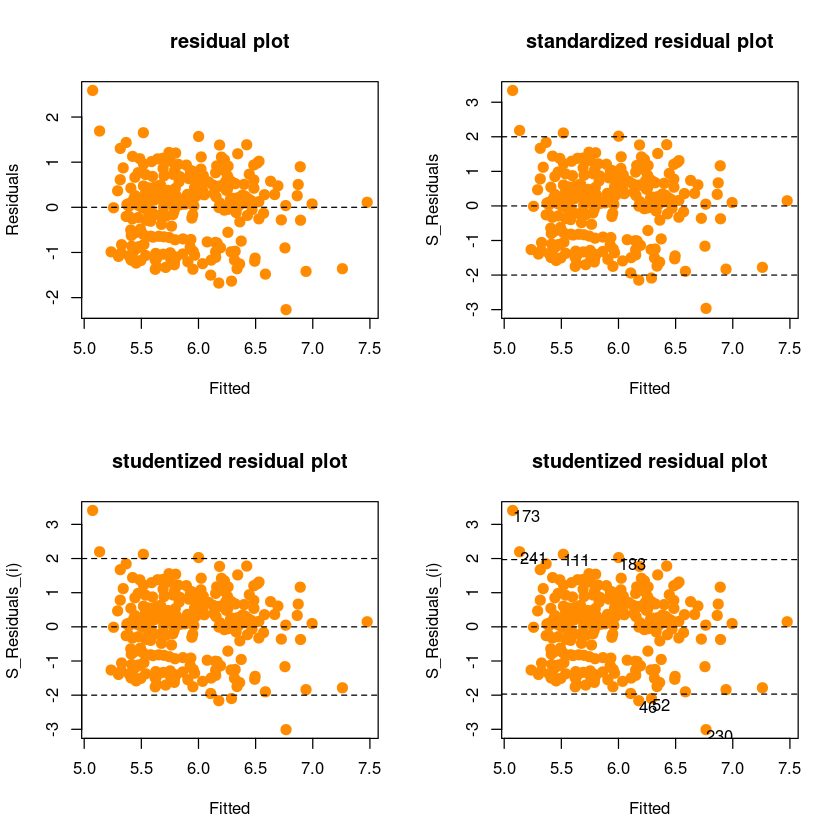

In [76]:
par(mfrow = c(2, 2))
plot(fitted(reg_model_2), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(reg_model_2), stad.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(stad.res)), 
            max(3,max(stad.res))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model_2), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model_2), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,nrow(hitters)-4),0,qt(0.975,nrow(hitters)-4)), lty=2)
text (fitted(reg_model_2)[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
      stu.res[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))], 
      which(abs(stu.res)>qt(0.975,nrow(hitters)-4)),adj = c(0,1))

In [77]:
stu.res[abs(stu.res)>qt(0.975,nrow(hitters)-4)]

-Cory Snyder -2.16182826573383 -Darnell Coles -2.09872610566858 -Jack Clark 2.12385831075298 -Mike Schmidt 3.40826964934749 -Ozzie Smith 2.0286158569726 -Steve Sax -3.00934037017267 -Terry Kennedy 2.19849337509094

In [78]:
which(abs(stu.res)>qt(0.975,nrow(hitters)-4))

-Cory Snyder 46 -Darnell Coles 52 -Jack Clark 111 -Mike Schmidt 173 -Ozzie Smith 183 -Steve Sax 230 -Terry Kennedy 241

In [79]:
influence(reg_model_2)

$sigma 
 -Alan Ashby 0.788087989207047 -Alvin Davis 0.788694226481284 -Andre Dawson 0.788661650873323 -Andres Galarraga 0.784684794952982 -Alfredo Griffin 0.788337114130146 -Al Newman 0.786262541299155 -Argenis Salazar 0.786802916611473 -Andres Thomas 0.784398464793053 -Andre Thornton 0.7850881428335 -Alan Trammell 0.788613981103893 -Alex Trevino 0.787230271479112 -Andy VanSlyke 0.788443711432741 -Alan Wiggins 0.785528352743374 -Bill Almon 0.788675988334844 -Buddy Bell 0.788548875937367 -Buddy Biancalana 0.788592315971829 -Bruce Bochy 0.788061155890424 -Barry Bonds 0.785378068169425 -Bobby Bonilla 0.786168555191178 -Bob Brenly 0.788232201709835 -Bill Buckner 0.788512427646438 -Brett Butler 0.788149915578498 -Bob Dernier 0.785813660772349 -Bo Diaz 0.787873065428321 -Bill Doran 0.788464477186018 -Brian Downing 0.787900316001232 -Billy Hatcher 0.7856791859616 -Brook Jacoby 0.788687839162256 -Bob Kearney 0.788527835166416 -Bill Madlock 0.787045649653056 -Bob Melvin 0.786484980327064 -BillyJo Robidoux 0.785740087144776 -Bill Schroeder 0.788596702820322 -Chris Bando 0.788610055889589 -Chris Brown 0.787125654887832 -Carmen Castillo 0.788679721825813 -Chili Davis 0.78811228983753 -Carlton Fisk 0.786089349695099 -Curt Ford 0.785317749724202 -Carney Lansford 0.78778198480267 -Chet Lemon 0.787566707678007 -Candy Maldonado 0.788678389348269 -Carmelo Martinez 0.788477865126042 -Craig Reynolds 0.788261244175587 -Cal Ripken 0.787863635256176 -Cory Snyder 0.781646564196697 -Chris Speier 0.788648618053139 -Curt Wilkerson 0.788684111170213 -Dave Anderson 0.788692872574602 -Don Baylor 0.787874897329411 -Daryl Boston 0.785236358622793 -Darnell Coles 0.782046884888717 -Dave Concepcion 0.78863268553584 -Doug DeCinces 0.788090534667608 -Darrell Evans 0.788671904266285 -Dwight Evans 0.787971280700316 -Damaso Garcia 0.787113204199 -Dan Gladden 0.788263659758164 -Dave Henderson 0.78862647579947 -Donnie Hill 0.788631269315016 -Davey Lopes 0.788158992681009 -Don Mattingly 0.788660291719989 -Dale Murphy 0.786078844438097 -Dwayne Murphy 0.787489141251169 -Dave Parker 0.788494124485019 -Dan Pasqua 0.78505429388851 -Darrell Porter 0.788693101647752 -Dick Schofield 0.788545491516604 -Don Slaught 0.788514203312617 -Darryl Strawberry 0.786807858453041 -Dale Sveum 0.784020227306241 -Danny Tartabull 0.784072466595428 -Denny Walling 0.788557073242349 -Dave Winfield 0.785184552147012 -Eric Davis 0.787925190716413 -Eddie Milner 0.78856906723733 -Eddie Murray 0.783899833933777 -Ed Romero 0.787764264758121 -Frank White 0.788565273918371 -George Bell 0.788680010666088 -Glenn Braggs 0.785303522751869 -George Brett 0.785626689374899 -Greg Brock 0.788564990901053 -Gary Carter 0.783947247342071 -Glenn Davis 0.785504133898955 -Gary Gaetti 0.788690454472167 -Greg Gagne 0.78675852038659 -George Hendrick 0.787283500279756 -Glenn Hubbard 0.787525873996843 -Garth Iorg 0.788525285594942 -Gary Matthews 0.787775386753804 -Graig Nettles 0.788339141078181 -Gary Pettis 0.788691757229353 -Gary Redus 0.788514562427462 -Garry Templeton 0.787032933366841 -Greg Walker 0.788261767785901 -Gary Ward 0.788375741945489 -Glenn Wilson 0.788592135020008 -Harold Baines 0.788499761629795 -Hubie Brooks 0.788078317104342 -Howard Johnson 0.78863904171628 -Hal McRae 0.78860563198926 -Harold Reynolds 0.78581978830625 -Harry Spilman 0.788529822154808 -Herm Winningham 0.786989228651752 -Jesse Barfield 0.788524019432133 -Juan Beniquez 0.788626689107663 -John Cangelosi 0.786082973427543 -Jose Canseco 0.78466538475743 -Joe Carter 0.783583328956248 -Jack Clark 0.781888793397349 -Jose Cruz 0.787913602863617 -Jody Davis 0.787233018430974 -Jim Dwyer 0.788610664564018 -Julio Franco 0.788655136326588 -Jim Gantner 0.787466856890579 -Johnny Grubb 0.788685819316832 -Jack Howell 0.786838108703902 -John Kruk 0.785844834141431 -Jeffrey Leonard 0.785209714654203 -Jim Morrison 0.78730398923047 -John Moses 0.784286439448128 -Jerry Mumphrey 0.78789542704568 -Jim Presley 0.78512023158689 -Johnny Ray 0.788673142619015 -Jeff Re

In [80]:
influence.measures(reg_model_2)

Influence measures of
     lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters) :

                      dfb.1_  dfb.AtBt  dfb.Hits  dfb.HmRn     dffit cov.r
-Alan Ashby         3.22e-02 -2.36e-03 -2.31e-03 -9.13e-03  0.046453 1.015
-Alvin Davis        3.86e-05 -1.57e-05 -1.71e-06 -2.29e-04 -0.000532 1.022
-Andre Dawson       2.04e-04  4.03e-03 -4.59e-03 -6.73e-03 -0.013393 1.024
-Andres Galarraga  -9.35e-02  4.62e-02 -3.03e-02 -1.59e-02 -0.120216 0.980
-Alfredo Griffin   -2.59e-02  9.50e-03  1.13e-02 -5.75e-02  0.076818 1.037
-Al Newman         -1.14e-01 -1.56e-02  4.18e-02  3.76e-02 -0.151315 1.005
-Argenis Salazar   -5.38e-02 -2.19e-02  2.25e-02  7.77e-02 -0.117140 1.007
-Andres Thomas     -7.30e-02 -1.82e-02  2.71e-02  4.29e-02 -0.128939 0.978
-Andre Thornton     1.30e-03  9.97e-02 -1.19e-01  6.95e-02  0.168499 0.991
-Alan Trammell      9.13e-03 -1.90e-03 -1.17e-03 -7.37e-03 -0.022981 1.025
-Alex Trevino       1.01e-01 -4.29e-02  2.38e-02 -7.59e-03  0.106184 1.012
-Andy 

In [81]:
summary(influence.measures(reg_model_2))

Potentially influential observations of
     lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters) :

                dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly   0.00  -0.04     0.04     0.01     0.05    1.12_*  0.00 
-George Bell     0.00  -0.01     0.01     0.01     0.02    1.05_*  0.00 
-Gary Gaetti     0.00   0.00     0.00     0.01     0.01    1.05_*  0.00 
-Jesse Barfield -0.01  -0.02     0.01     0.06     0.07    1.06_*  0.00 
-Kirby Puckett   0.04   0.28    -0.32    -0.17    -0.43_*  1.02    0.05 
-Mike Schmidt    0.60  -0.26     0.12     0.03     0.61_*  0.88_*  0.09 
-Spike Owen     -0.02   0.03    -0.03    -0.03     0.04    1.05_*  0.00 
-Steve Sax       0.06   0.38    -0.54     0.34    -0.73_*  0.94_*  0.13 
-Tony Gwynn      0.01   0.05    -0.06     0.02    -0.08    1.06_*  0.00 
-Terry Kennedy   0.40  -0.21     0.11     0.04     0.40_*  0.97    0.04 
-Vince Coleman   0.10  -0.16     0.13     0.14    -0.21    1.06_*  0.01 
-Wade Boggs 

In [82]:
summary(influence.measures(reg_model))

Potentially influential observations of
     lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                 dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly    0.01  -0.38     0.42     0.15     0.50_*  1.07_*  0.06 
-Dale Murphy     -0.17   0.11    -0.09     0.24     0.40_*  0.92_*  0.04 
-Dave Winfield   -0.14   0.12    -0.11     0.17     0.34    0.91_*  0.03 
-Eddie Murray     0.06  -0.32     0.36     0.09     0.49_*  0.78_*  0.06 
-George Bell     -0.01  -0.02     0.02     0.02     0.04    1.05_*  0.00 
-Gary Carter     -0.06   0.11    -0.13     0.26     0.38_*  0.88_*  0.03 
-Gary Gaetti      0.01   0.01    -0.01    -0.03    -0.03    1.05_*  0.00 
-Jesse Barfield  -0.01  -0.03     0.02     0.10     0.12    1.06_*  0.00 
-Jack Clark       0.20  -0.03    -0.03     0.06     0.24    0.94_*  0.01 
-Jim Rice        -0.05  -0.43     0.54     0.05     0.67_*  0.87_*  0.11 
-Keith Hernandez -0.02  -0.18     0.25    -0.07     0.34    0.94_*  0.03 
-Kir

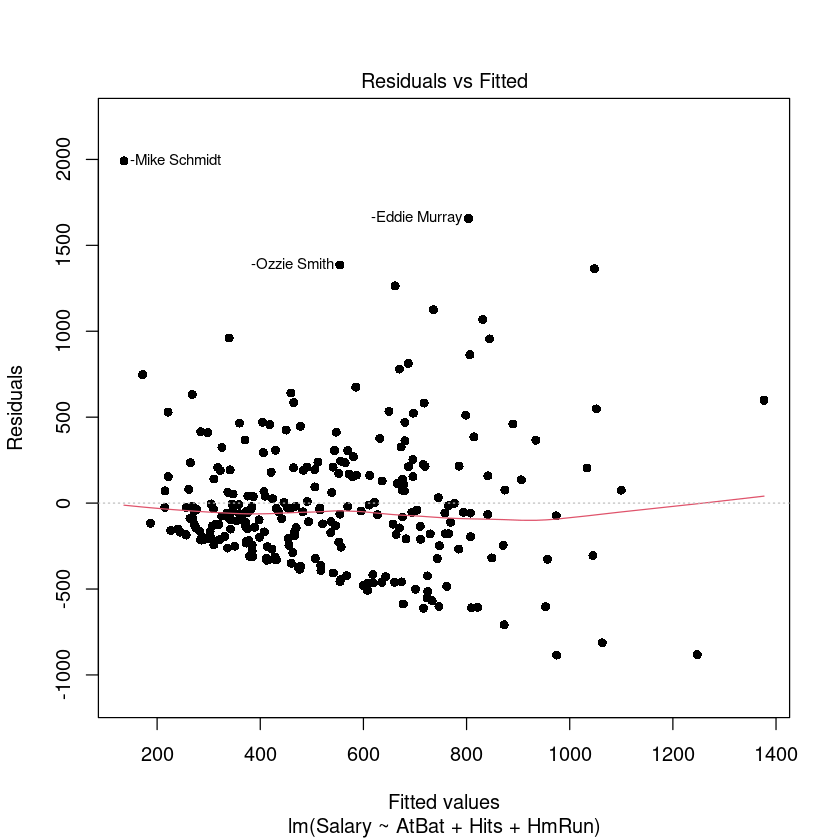

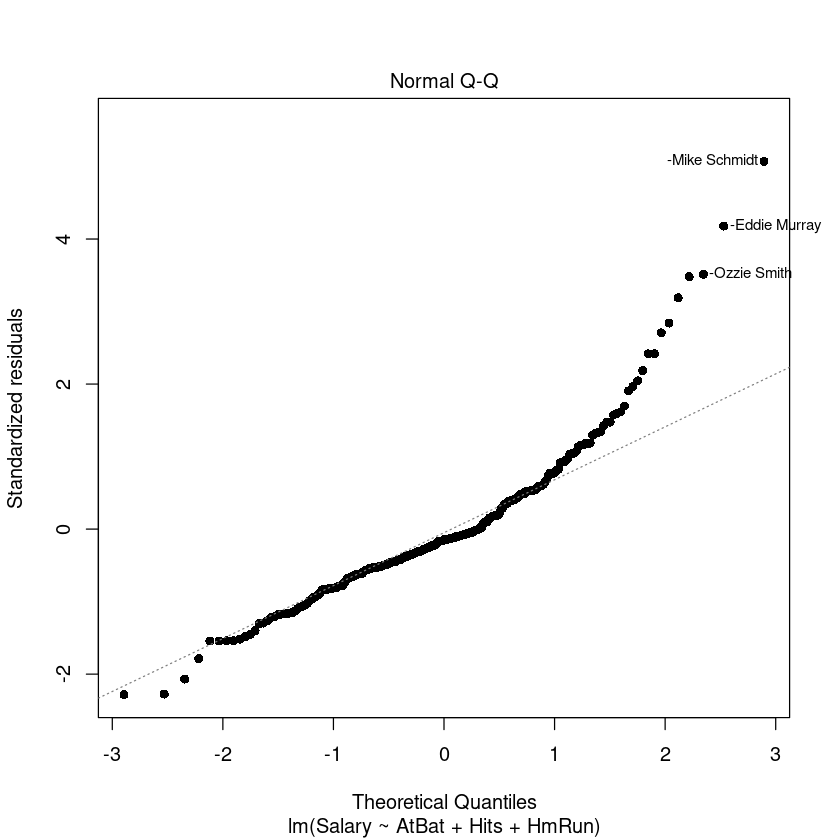

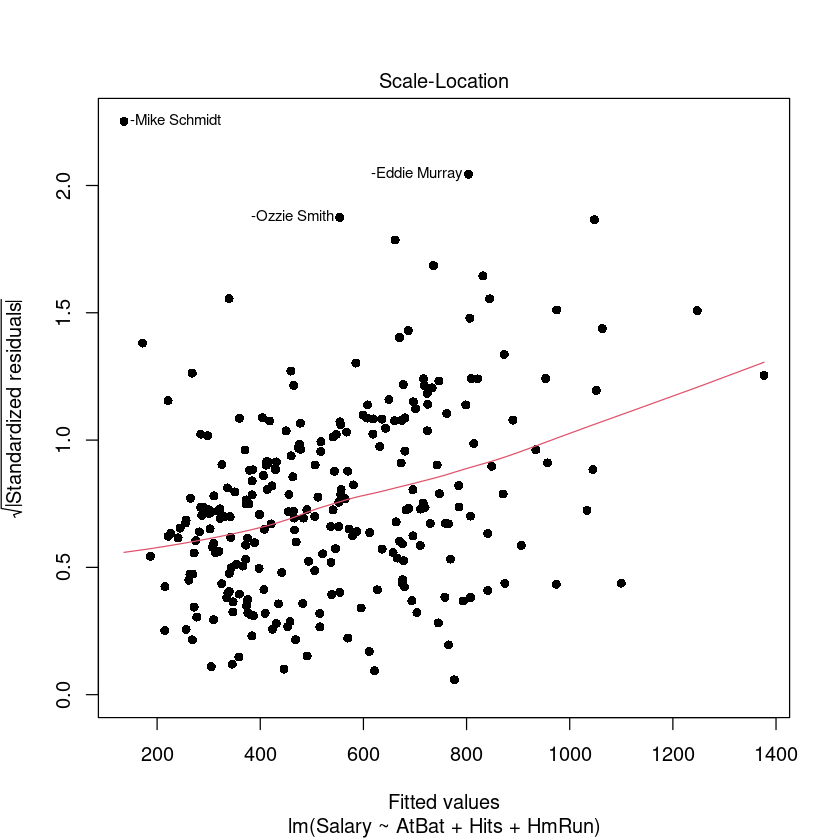

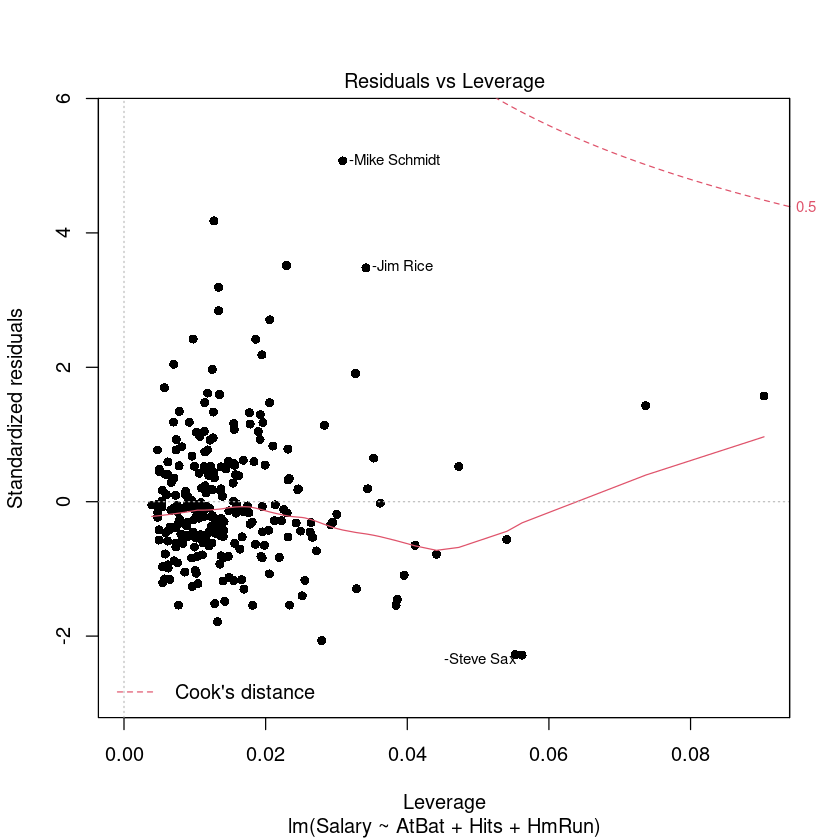

In [83]:
plot(reg_model, pch=16)

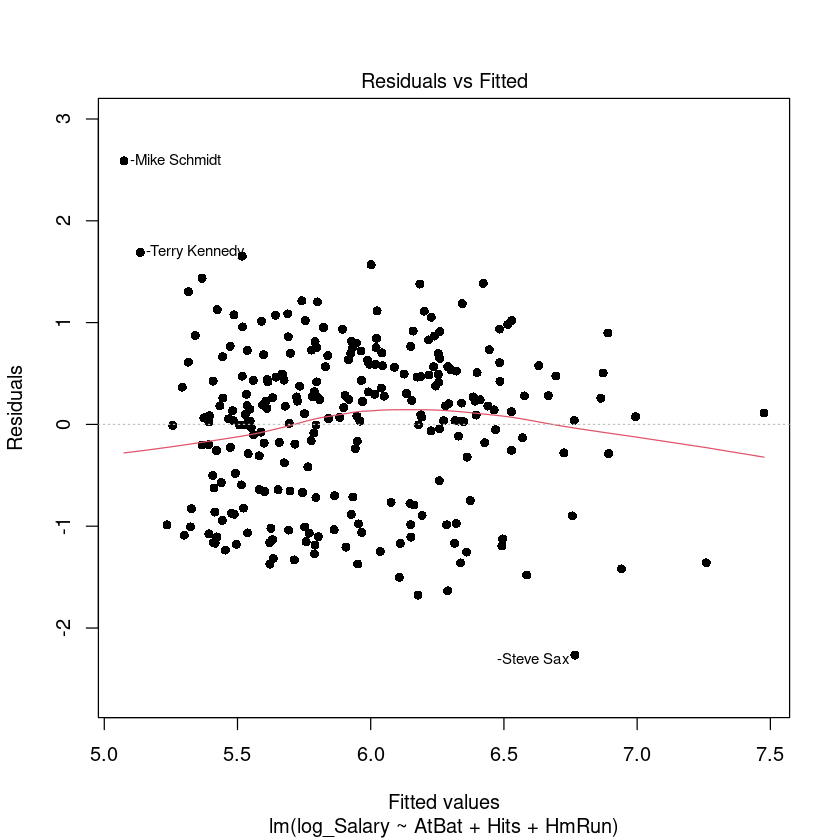

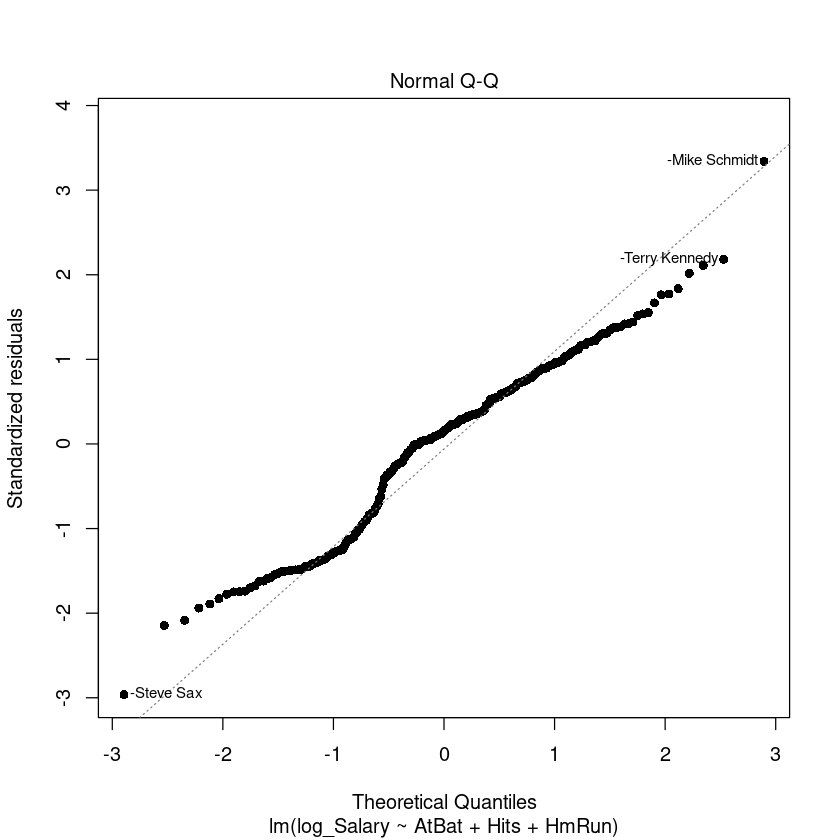

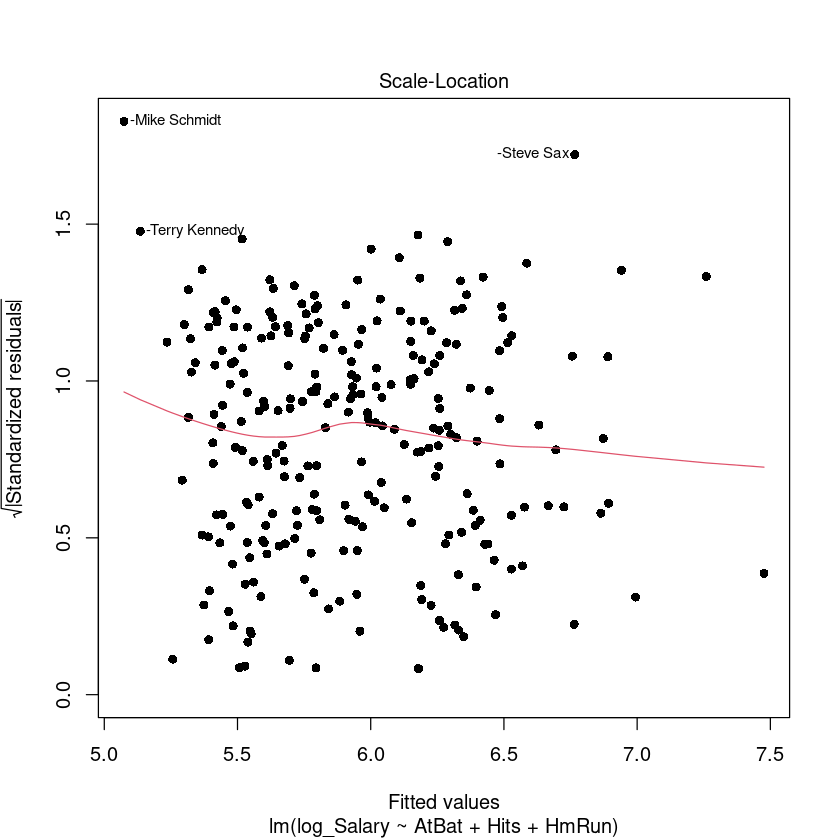

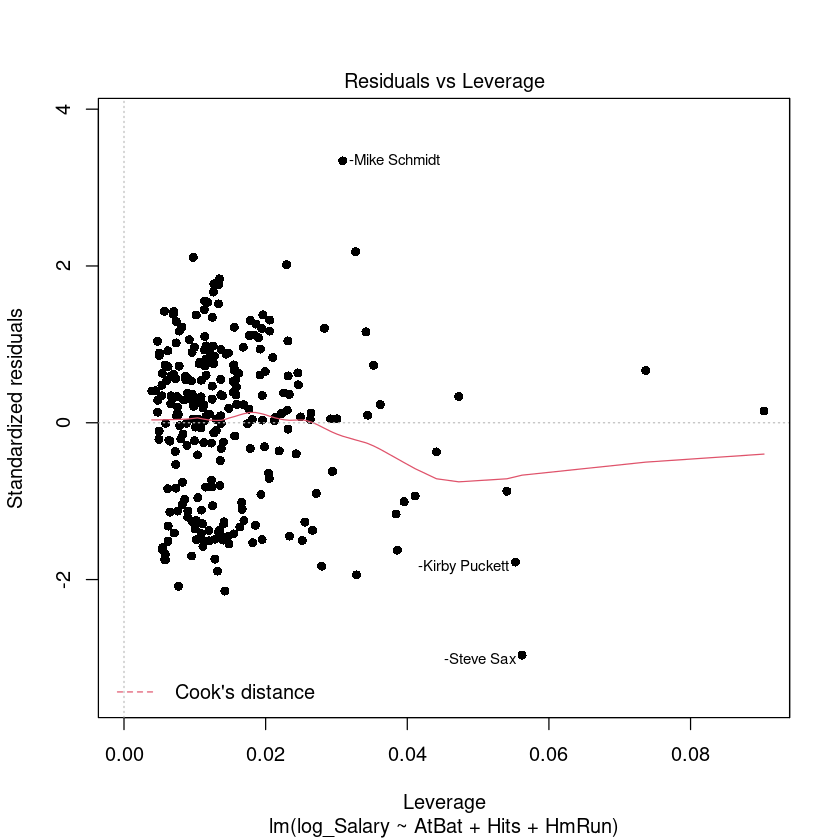

In [84]:
plot(reg_model_2, pch=16)